<a href="https://colab.research.google.com/github/RamadeviKN/Student-Performance-Analysis-Using-Machine-Learning/blob/main/student_performance_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Importing the dataset

In [23]:
dataset = pd.read_csv('Student_Performance.csv')
# Assuming that 'Hours_Studied' is the independent variable and 'Score' is the dependent variable
X = dataset[['Hours Studied']]  # Independent variable
y = dataset['Performance Index']  # Dependent variable
print(X)
print(y)

      Hours Studied
0                 7
1                 4
2                 8
3                 5
4                 7
...             ...
9995              1
9996              7
9997              6
9998              9
9999              7

[10000 rows x 1 columns]
0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64


## Split the data into training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Linear Regression model on the whole dataset

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_train = PolynomialFeatures(degree = 4)
poly_reg_test = PolynomialFeatures(degree = 4)
X_poly_train = poly_reg_train.fit_transform(X_train)
X_poly_test = poly_reg_test.fit_transform(X_test)
lin_reg_train = LinearRegression()
lin_reg_train.fit(X_poly_train, y_train)
lin_reg_test = LinearRegression()
lin_reg_test.fit(X_poly_test, y_test)

LinearRegression()

## Make predictions

In [34]:
y_train_pred = lin_reg_train.predict(X_poly_train)  # Predictions on training data
y_test_pred = lin_reg_test.predict(X_poly_test)  # Predictions on testing data

# Calculate R-squared values

In [36]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')

Training R-squared: 0.14170231171107284
Testing R-squared: 0.1374175291711326


## Visualising the Polynomial Regression results

Sort values for better visualization

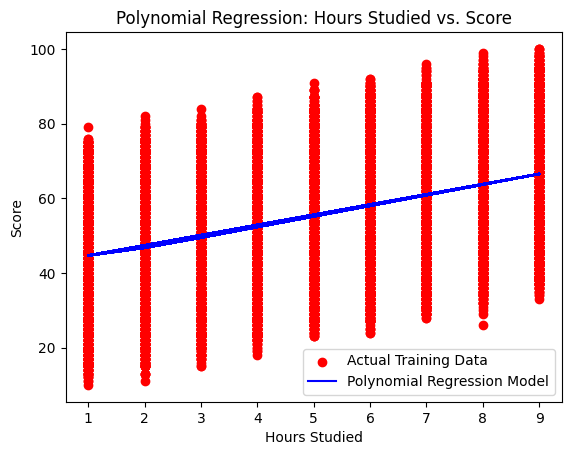

In [38]:
##sorted_indices = np.argsort(X_train.values.flatten())
##X_train_sorted = X_train.values.flatten()[sorted_indices]
##y_train_pred_sorted = y_train_pred[sorted_indices]

plt.scatter(X_train, y_train, color='red', label='Actual Training Data')
##plt.plot(X_train_sorted, y_train_pred_sorted, color='blue', label='Polynomial Regression Model')
plt.plot(X_train, y_train_pred, color='blue', label='Polynomial Regression Model')
plt.title('Polynomial Regression: Hours Studied vs. Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()

## Visualising the Test set Polynomial Regression results

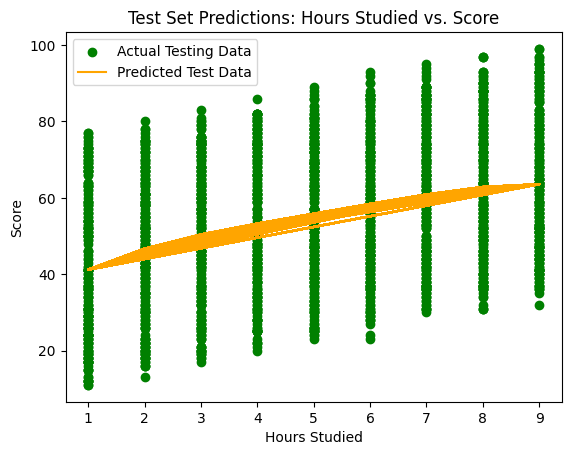

In [39]:
# Visualizing the test set predictions
plt.scatter(X_test, y_test, color='green', label='Actual Testing Data')
plt.plot(X_test, y_test_pred, color='orange', label='Predicted Test Data')
plt.title('Test Set Predictions: Hours Studied vs. Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

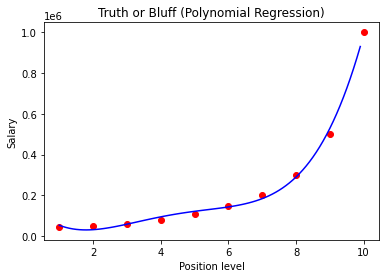

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])